# Aproximación polinomial

Se utiliza para encontrar valores que no se encuentran tabulados; por ejemplo, se cuenta con los datos de temperatura de ebullición para la acetona a diferentes presiones:


|**Puntos**| 0  | 1    | 2    | 3    |
|:---       |--- |---   |---   |---   |
|$T(ºC)$   |56.5| 113.0| 181.0| 214.5|
|$P(atm)$  | 1  | 5    | 20   | 40   |

Se desea saber la temperatura de ebullición de la acetona a $2\,atm$.

Considerando que la ebullución de la acetona se comporta de forma lineal en el intervalo $(0\,atm-5\,atm)$ que deseamos encontrar la temperatura, se puede resolver de la forma siguiente:

**Paso 1:** considerando que la temperatura se comporta de forma lineal, se tiene que:

$$T(P)=a_0 + a_1\,P $$

**Paso 2:** se toman los puntos 0 y 1, porque entre esos puntos se encuentra la temperatura a la presión que se desea.

$$\begin{align*}
56.5 &= a_0 + 1\,a_1,\, \text{punto 0}\\
113.0 &= a_0 + 5\,a_1,\, \text{punto 1}
\end{align*}$$

**Paso 3:** resolviendo el sistema se tiene que $a_0 = 42.4$ y $a_1 = 14.13$, por tanto, la ecuación que describe la temperatura en función de la presión en el intervalo de $0\,atm$ a $5\,atm$ es:

$$T(P)=42.4 + 14.13\,P $$

**Paso 4:** evaluar la ecuación en $2\,atm$ para encontrar la temperatura de ebullición deseada.

In [1]:
T = lambda P: 42.4 + 14.13*P    # Creamos una funcón lambda con la ecuación obtenida 

In [2]:
T(2)    # Evaluamos la función en 2 atm 

70.66

Al graficar los datos tabulados y los datos que genera la ecuación que describe la temperatura en función de la presión en el intervalo de $0\,atm$ a $5\,atm$, se puede observar que la aproximación sólo funciona en el intervalo para el cual se construyó.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
Temperatura = [56.5, 113.0, 181.0, 214.5]
Presion = [1, 5, 20, 40]
p = np.arange(1, 20)
plt.plot(Presion,Temperatura, "ko")
plt.plot(p,T(p))
plt.xlabel("Presion, atm")
plt.ylabel("Temperatura, grados C")
plt.show()

<Figure size 640x480 with 1 Axes>

Si se desea encontrar una aproximación mejor a la anterior $(70.66\,ºC)$, se puden usar más puntos de los datos tabulados, por ejemplo, los puntos $0,1$ y $2$; y aproximar el comportamiento de la temperatura de forma cuadrática:

$$T(P) = a_0 + a_1\,P + a_2\,P^2$$

**Paso 1:** considerando los puntos $0,1$ y $2$, se llega a un sistema de ecuaciones lineales:

$$\begin{align*}
56.5  &= a_0 + a_1\,1 + a_2\,1^2 \, \text{punto o}\\
113.0 &= a_0 + a_1\,5 + a_2\,5^2 \, \text{punto 1}\\
181.0 &= a_0 + a_1\,20 + a_2\,20^2 \, \text{punto 2}
\end{align*}$$

**Paso 2:** Resolver el sistema de ecuaciones lineales.

In [4]:
"""
Vamos a utilizar el método solve de la biblioteca numpy para resolver el sistema de ecuaciones lineales
"""

# Resolviendo el sistema utilizando el método solve
A = np.array([[1,1,1],[1,5,25],[1,20,400]])    # Matriz de coeficientes A
b = np.array([56.5,113.0,181.0])    # Vector b
x = np.linalg.solve(A,b)    # se llama a método solve para resolver el sistema

In [5]:
print x    # Imprimimos la solución

[39.85087719 17.15394737 -0.50482456]


La ecuación que describe la temperatura en función de la presión en el intervalo de $0\,atm$ a $20\,atm$ es:

$$T(P)=39.85 + 17.15\,P - 0.5048\,P^2 $$

**Paso 4:** evaluar la ecuación en 2 atm. 

In [6]:
T = lambda P: 39.85 + 17.15*P - 0.5048*P**2
T(2)

72.13080000000001

Al graficar los datos tabulados y la función cuadrática se pude observar que el ajuste a los datos tabulados es mejor. 

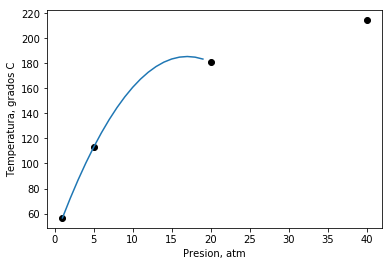

In [7]:
plt.plot(Presion,Temperatura, "ko")
plt.plot(p,T(p))
plt.xlabel("Presion, atm")
plt.ylabel("Temperatura, grados C")
plt.show()

**Tarea** Realice una aproximación polinomial cubica $(T(P) = a_0 + a_1\,P + a_2\,P^2 + a_3\,P^3)$ a los datos datos tabulados.

# Polinomios de Lagrange

Partiendo de una función $f(x)$ desconocida dada en forma tabular $([x_0,f(x_0)],[x_1,f(x_1)]\ldots[x_n,f(x_n)])$, y asumiendo que un polinomio $p(x)$ de primer grado se puede escribir de la forma siguiente:

$$p(x)=a_0\,(x-x_1) + a_1\,(x-x0) $$

donde $x_1$ y $x_0$ son puntos conocidos y $a_0$ y $a_1$ son los coeficientes que se desean determinar.

> Resolviendo para $a_0$, se considera $x = x_0$.

$$a_0 = \dfrac{p(x_0)}{x_0 - x_1} = \dfrac{f(x0)}{x_0 - x_1} $$

> Resolviendo par $a_1$, se hace $x=x_1$

$$a_1 = \dfrac{p(x_1)}{x_1 - x_0} = \dfrac{f(x_1)}{x_1 - x_0} $$

Sustituyendo el valor de $a_1$ y $a_0$ en el polinomio de primer grado:

$$p(x) = L_0\,(x - x_1) + L_1\,(x-x_0)$$

donde:


$$\begin{align*}
L_0 &= \dfrac{f(x_0)}{x_0 - x_1}\\
L_1 &= \dfrac{f(x_1)}{x_1 - x_0}
\end{align*}$$

> Para un _polinomio de segundo grado_:

$$p_2(x) = a_0\,(x - x_1)\,(x - x_2) + a_1\,(x-x_0)\,(x-x_2) + a_2\,(x-x_0)\,(x-x_1)$$

> puede escribirse:

$$p_2(x) = L_0(x)\,f(x_0) + L_1(x)\,f(x_1) + L_2(x)\,f(x_2)$$

> donde:

$$\begin{align*}
L_0(x) &= \dfrac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}\\
L_1(x) &= \dfrac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}\\
L_2(x) &= \dfrac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}\\
\end{align*}$$

> Para un polinomio de _n_-ésimo grado:

$$p_n(x) = L_0(x)\,f(x_0) + L_1(x)\,f(x_1) + \ldots + L_n(x)\,f(x_n)$$

> donde:

$$\begin{align*}
L_0(x) &= \dfrac{(x - x_1)(x - x_2)\ldots(x - x_n)}{(x_0 - x_1)(x_0 - x_2)\ldots(x_0 - x_n)}\\
L_1(x) &= \dfrac{(x - x_0)(x - x_2)\ldots(x - x_n)}{(x_1 - x_0)(x_1 - x_2)\ldots(x_1 - x_n)}\\
\vdots &\\
L_n(x) &= \dfrac{(x - x_0)(x - x_1)\ldots(x - x_{n-1})}{(x_n - x_0)(x_n - x_1)\ldots(x_n - x_{n-1})}
\end{align*}$$

La biblioteca _scipy_ posee el método _lagrange_ para realizar interpolación.

Considere todos los puntos de los datos tabulados de temperatura de ebullición para la acetona para construir un polinomio de interpolación de Lagrange:

In [8]:
from scipy.interpolate import lagrange    # Cargamos el método lagrange
P = np.array([1, 5, 20, 40])    # Datos de presión, variable independiente
T = np.array([56.5, 113.0, 181.0, 214.0])    # Datos de temperatura, variable dependiente
# El polinomio resultante se almacenará en la varible pol
pol = lagrange(P,T)    # Enviamos los datos de P y T al método lagrange

In [9]:
# Evaluamos en 2 atm el polinomio resultante 
pol(2)

72.7243956043956

In [10]:
"""
Si se desea conocer los coeficientes del polinomio es necesario importar
el método Polynomial de la biblioteca numpy
"""
from numpy.polynomial.polynomial import Polynomial    

coeficientes = Polynomial(pol).coef
print coeficientes

[ 1.08318874e-02 -7.86453634e-01  1.85079333e+01  3.87676885e+01]


In [11]:
# Con el método poly1d se puede generar la ecuación del polinomio
print np.poly1d(coeficientes)    

         3          2
0.01083 x - 0.7865 x + 18.51 x + 38.77


Al graficar los datos tabulados y el polinomio de interpolación de lagrange se pude observar que el ajuste a los datos tabulados es mejor. 

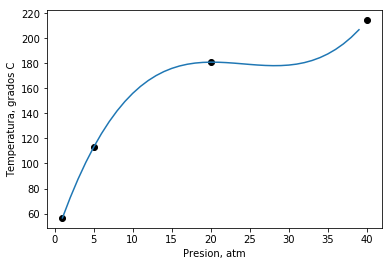

In [12]:
p = np.arange(1,40)
plt.plot(Presion,Temperatura, "ko")
plt.plot(p,pol(p))
plt.xlabel("Presion, atm")
plt.ylabel("Temperatura, grados C")
plt.show()

**Tarea:** Utilizando el algoritmo de Lagrange, construya un polinomio de interpolación considerando los puntos 0,1 y 2. 

# Polinomios de Newton 

Considere nuevamente que se tiene una función (datos tabulados) en forma tabular:

|Puntos | 0        | 1        | 2        | 3        | $\ldots$ | $n$      |   
|---    | ---      | ---      | ---      | ---      | ---      | ---      |
|$x$    | $x_0$    | $x_1$    | $x_2$    | $x_3$    | $\ldots$ | $x_n$    |
|$f(x)$ | $f[x_0]$ | $f[x_1]$ | $f[x_2]$ | $f[x_3]$ | $\ldots$ | $f[x_n]$ |

y que se desea aproximar los datos a un polinomio $p(x)$ de primer grado que pasa por los puntos $0$ y $1$. Dicho polonomio se puede escribir de la forma:

$$p(x) = a_0 + a_1\,(x - x0)$$

donde $x_0$ es la abscisa del punto $0$ y $a_0$ y $a_1$ son parámetros que se tienen que determinar.

> Para encontrar $a_0$ se considera que $x = x_0$, por lo que:

$$a_0 = p(x_0) = f[x_0]$$

> Para encontrar $a_1$ se considera que $x = x_1$:

$$a_1 = \dfrac{f[x_1] - f[x_0]}{(x_1 - x_0)}$$

> donde a $\dfrac{f[x_1] - f[x_0]}{(x_1 - x_0)} = f[x_0,x_1]$  se le conoce como primera diferencia dividida, por lo que el polinomio de primer grado queda en términos de diferencias divididas.

$$p(x) = f[x_0] + (x - x_0)\,f[x_0,x_1]$$

Ahora considere que por los puntos $0$, $1$ y $2$ pasa un _polinomio de segundo grado_ $p_2(x)$ de la forma:

$$p_2(x) = a_0 + a_1\,(x - x0) + a_2\,(x - x_0)\,(x - x_1)$$

donde $x_0$ y $x_1$ son las abscisas de los puntos $0$ y $1$ y $a_0$, $a_1$ y $a_2$ son parámetros a determinar:

> Para encontrar $a_0$ se considera que $x = x_0$, por lo que:

$$a_0 = p_2(x_0) = f[x_0]$$

> Para encontrar $a_1$ se considera que $x = x_1$, por lo que:

$$a_1 =\dfrac{f[x_1] - f[x_0]}{(x_1 - x_0)} = f[x_0,x_1]$$

> Para encontrar $a_2$ se considera que $x = x_2$, por lo que:

$$a_2 =\dfrac{\dfrac{f[x_2] - f[x_1]}{(x_2 - x_1)} - \dfrac{f[x_1] - f[x_0]}{(x_1 - x_0)}}{x_2 - x_0} = f[x_0,x_1,x_2]$$

>> a $f[x_0,x_1,x_2]$ se le conoce como segunda diferencia dividida respecto a $x_0,\,x_1$ y $x_2$.

Sustituyendo en $p_2(x)$ los valores de $a_0,\,a_1$ y $a_2$ se obtiene:

$$p_2(x) = f[x_0] + (x - x_0)\,f[x_0,x_1] + (x - x_0)\,(x - x_1)\,f[x_0,x_1,x_2]$$


**Generalizando**

Considerando que por todos los puntos (datos tabulados) $0,\, 1,\, 2,\,\ldots, n$ pasa un polinomio de grado $n$ $(p_n(x))$ de la forma:

$$p_n(x) = a_0 + a_1\,(x - x_0) + a_2\,(x - x_0)\,(x - x_1) + \ldots + a_n\,(x - x_0)(x - x_1)\ldots(x - x_{n-1})$$

cuyos coeficientes están en términos de diferencias divididas (Ver Tabla de Diferencias divididas):

$$\begin{align*} 
a_0 &= f[x_0]\\
a_1 &= f[x_0,x_1]\\
a_2 &= f[x_0,x_1,x_2]\\
\vdots \\
a_n &= f[x_0,x_1,x_2,\ldots,x_n]
\end{align*}$$



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow"><span style="font-weight:400;font-style:normal">Diferencias divididas</span></th>
    <th class="tg-c3ow">Diferencias divididas</th>
    <th class="tg-c3ow"></th>
    <th class="tg-c3ow"></th>
    <th class="tg-c3ow"></th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">$x$</td>
    <td class="tg-c3ow">$f(x)$</td>
    <td class="tg-c3ow">Primeras</td>
    <td class="tg-c3ow">Segundas</td>
    <td class="tg-c3ow">Terceras</td>
    <td class="tg-0pky">$\ldots$</td>
  </tr>
  <tr>
    <td class="tg-c3ow">$x_0$</td>
    <td class="tg-c3ow">$f[x_0]$</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">$f[x_0,x_1]=\dfrac{f[x_1]-f[x_0]}{x_1 - x_0}$</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-c3ow">$x_1$</td>
    <td class="tg-c3ow">$f[x_1]$</td>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">$f[x_0,x_1,x_2]=\dfrac{f[x_1,x_2]-f[x_0,x_1]}{x_2 - x_0}$</td>
    <td class="tg-c3ow"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$f[x_1,x_2]=\dfrac{f[x_2]-f[x_1]}{x_2 - x_1}$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">$f[x_0,x_1,x_2,x_3]=\dfrac{f[x_1,x_2,x_3]-f[x_0,x_1,x_2]}{x_3 - x_0}$</span><br><br></td>
    <td class="tg-0pky">$\ldots$</td>
  </tr>
  <tr>
    <td class="tg-0pky">$x_2$</td>
    <td class="tg-0pky">$f[x_2]$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$f[x_1,x_2,x_3]=\dfrac{f[x_2,x_3]-f[x_1,x_2]}{x_3 - x_1}$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">$f[x_2,x_3]=\dfrac{f[x_3]-f[x_2]}{x_3 - x_2}$</span><br><br></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$f[x_1,x_2,x_3,x_4]=\dfrac{f[x_2,x_3,x_4]-f[x_1,x_2,x_3]}{x_4 - x_1}$</td>
    <td class="tg-0pky">$\ldots$</td>
  </tr>
  <tr>
    <td class="tg-0pky">$x_3$</td>
    <td class="tg-0pky">$f[x_3]$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$f[x_2,x_3,x_4]=\dfrac{f[x_3,x_4]-f[x_2,x_3]}{x_4 - x_2}$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$f[x_3,x_4]=\dfrac{f[x_4]-f[x_3]}{x_4 - x_3}$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$f[x_2,x_3,x_4,x_5]=\dfrac{f[x_3,x_4,x_5]-f[x_2,x_3,x_4]}{x_5 - x_2}$</td>
    <td class="tg-0pky">$\ldots$</td>
  </tr>
  <tr>
    <td class="tg-0pky">$x_4$</td>
    <td class="tg-0pky">$f[x_4]$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$f[x_3,x_4,x_5]=\dfrac{f[x_4,x_5]-f[x_3,x_4]}{x_5 - x_3}$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$f[x_4,x_5]=\dfrac{f[x_5]-f[x_4]}{x_5 - x_4}$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">$x_5$</td>
    <td class="tg-0pky">$f[x_5]$</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>

La biblioteca _scipy_ contiene varios métodos para interpolar, aquí usaremos el método _interp1d_. A este método se le puede indicar qué tipo de interpolación se requiere:

+ Lineal
+ Cuadrática
+ Cúbica 

Por default utiliza la oprción _lineal_.

Considere los siguientes datos tabulados.

|Puntos | 0     | 1     | 2     | 3     | 4     | 5     |
|---    | ---   | ---   | ---   | ---   | ---   | ---   |
|$x$    | -2    | -1    | 0     | 2     | 3     | 6     |
|$f(x)$ | -18   | -5    | -2    | -2    | 7     | 142   |

In [32]:
# Primero vamos a cargar el método interp1d.

from scipy.interpolate import interp1d

# Almacenamos los datos de x y f(x) en vectores.

x = np.array([-2, -1, 0, 2, 3, 6])
fx = np.array([-18, -5, -2, -2, 7, 142])
interpol_defaul = interp1d(x,fx)    # Interpolación lineal
interpol_cuadratica = interp1d(x,fx, kind = "quadratic")    # Interpolación cuadrátrica
interpol_cubica = interp1d(x,fx, kind = "cubic")    # Interpolación cubica

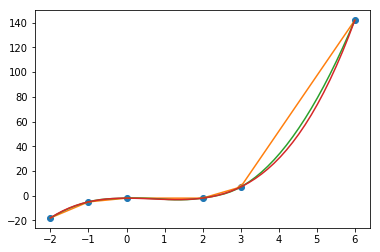

In [33]:
xnew = np.linspace(-2,6)
plt.plot(x,fx,"o")
plt.plot(xnew,interpol_defaul(xnew))
plt.plot(xnew,interpol_cuadratica(xnew))
plt.plot(xnew,interpol_cubica(xnew))
plt.show()